In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [2]:
## Reading and glancing at the data
df = pd.read_csv('day.csv')
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


# Data Cleaning and EDA

In [3]:
## Looking at the number of rows and columns 
df.shape

(730, 16)

In [4]:
## No missing information, all datapoints have the required info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
## Converting the dates into proper format
df['dteday'] = pd.to_datetime(df.dteday)
df['season'] = df['season'].astype('object')
df['mnth'] = df['mnth'].astype('object')
df['weekday'] = df['weekday'].astype('object')
df['weathersit'] = df['weathersit'].astype('object')

In [6]:
## Looking at the numerical summary of the data
df.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Visualiziation

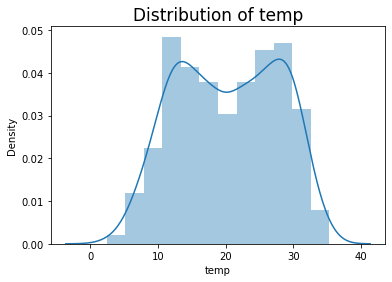

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


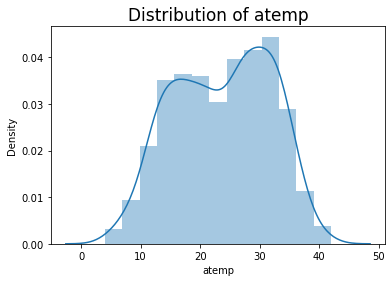

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


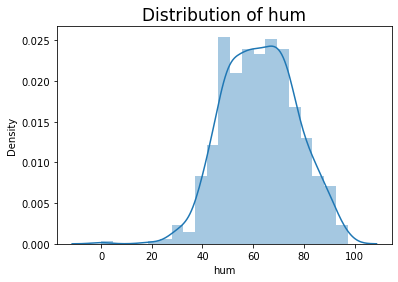

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


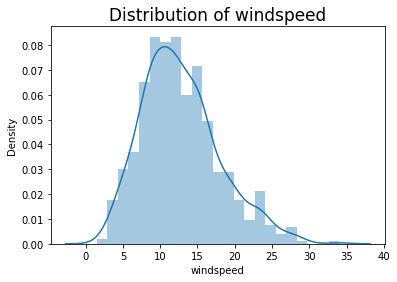

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


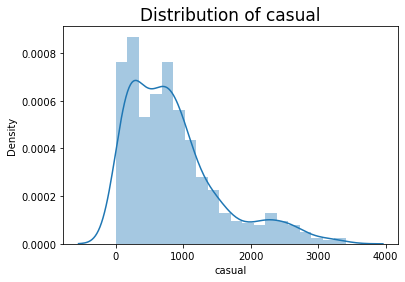

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


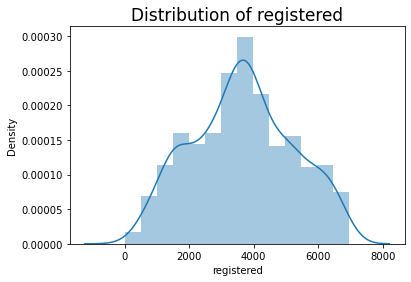

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


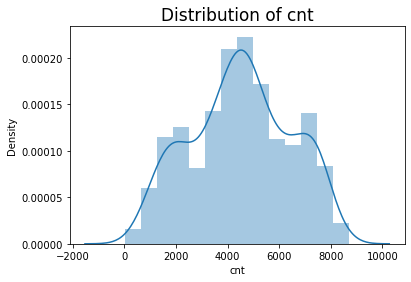

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


In [7]:
### Visualizing the distributions of all numerical columns in the dataframe
numvar = ['temp','atemp','hum','windspeed','casual','registered','cnt']
for col in df[numvar]:
    sns.distplot(df[col])
    plt.title('Distribution of {}'.format(col),size=17)
    plt.show()
    print('zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz')

As I see it, only 'hum' and 'windspeed' are somewhat normally distributed, rest all are not at all normally distributed, which is not a problem, but is not a good thing either.

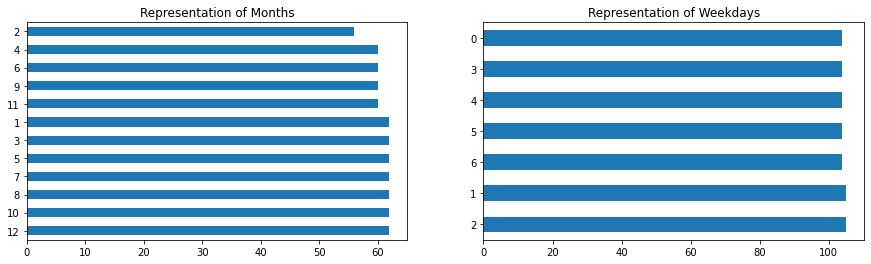

In [8]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df.mnth.value_counts().plot.barh()
plt.title('Representation of Months')
plt.subplot(1,2,2)
df.weekday.value_counts().plot.barh()
plt.title('Representation of Weekdays')
plt.show()

#### Trying to figure out if seperate dummy vars needed for these 2 features
As is visible the weekdays and the months are almost equally distributed, hence there is no problem there.

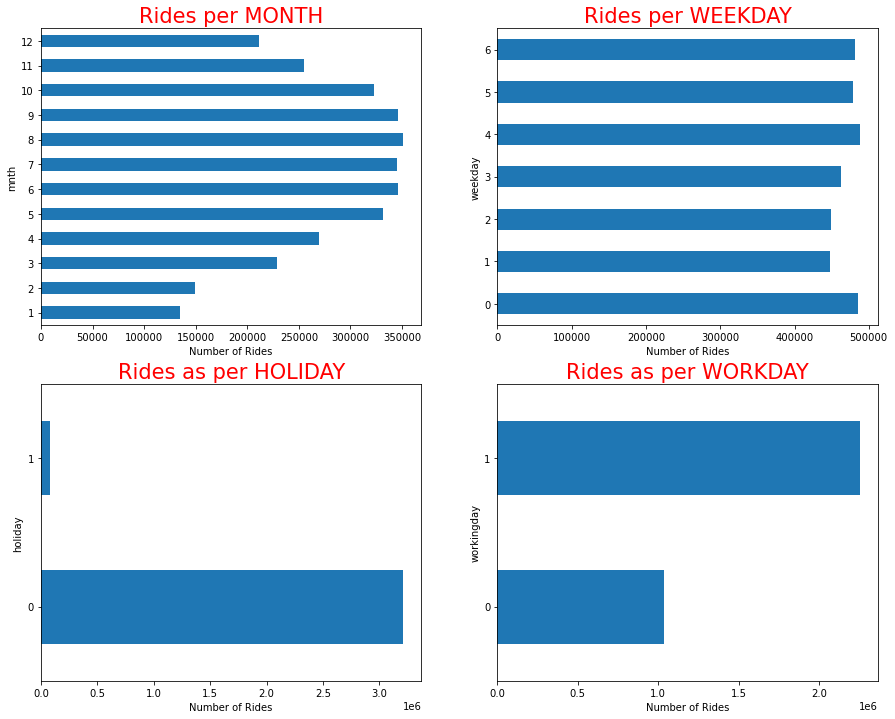

In [9]:
## Categorical Variables Visualization
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
df.groupby('mnth')['cnt'].sum().plot.barh()
plt.title('Rides per MONTH',fontsize=21,color='r')
plt.xlabel('Number of Rides')
plt.subplot(2,2,2)
df.groupby('weekday')['cnt'].sum().plot.barh()
plt.title('Rides per WEEKDAY',fontsize=21,color='r')
plt.xlabel('Number of Rides')
plt.subplot(2,2,3)
df.groupby('holiday')['cnt'].sum().plot.barh()
plt.title('Rides as per HOLIDAY',fontsize=21,color='r')
plt.xlabel('Number of Rides')
plt.subplot(2,2,4)
df.groupby('workingday')['cnt'].sum().plot.barh()
plt.title('Rides as per WORKDAY',fontsize=21,color='r')
plt.xlabel('Number of Rides')
plt.show()

### Inferences from the above subplot
- As i see it, there's a clear difference going on between the rides per month between month 5 - 10, indicating a sort of seasonal pattern.So, maybe we'll need to convert months into original categorical values and then lastly to dummy variables.
- As for the Weekdays, there's almost same traffic going on daily, whatever the day maybe. So, that may not be of much help here
- As per Holiday, it is very evident that people don't ride on their HOLIDAYS and use these bikes on their WORKDAYS much more often
    - This suggests that these bikes are a awful lot popular for short distance work commutes<br>
    
    
Still, I'll create dummy variables for 'Weekdays' feature as well, just in case to run it through the RFE

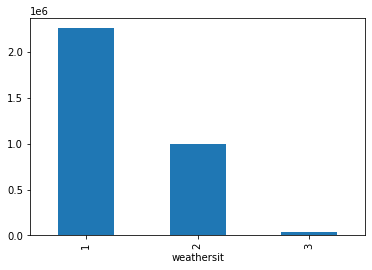

In [10]:
### Looking to find out the Rides pattern in different Weather Situations
df.groupby('weathersit')['cnt'].sum().plot.bar()
plt.show()

CLEARLY, there is a pattern emerging from the weather situation, a DEGRADING one at that.. Which keeps falling and is almost non-existent for the 3rd weather situation and not at all for the 4th one.Hence, it is to be converted into dummy vars

In [11]:
casum=df.casual.sum()
regsum = df.registered.sum()
cas=round((casum/(df.cnt.sum()))*100,2)
reg=round((regsum/(df.cnt.sum()))*100,2)
print('Total Rides are',df.cnt.sum(),'out of which',cas,'%','are from casual users and the rest',reg,'%','is from Registered users')

Total Rides are 3290845 out of which 18.84 % are from casual users and the rest 81.16 % is from Registered users


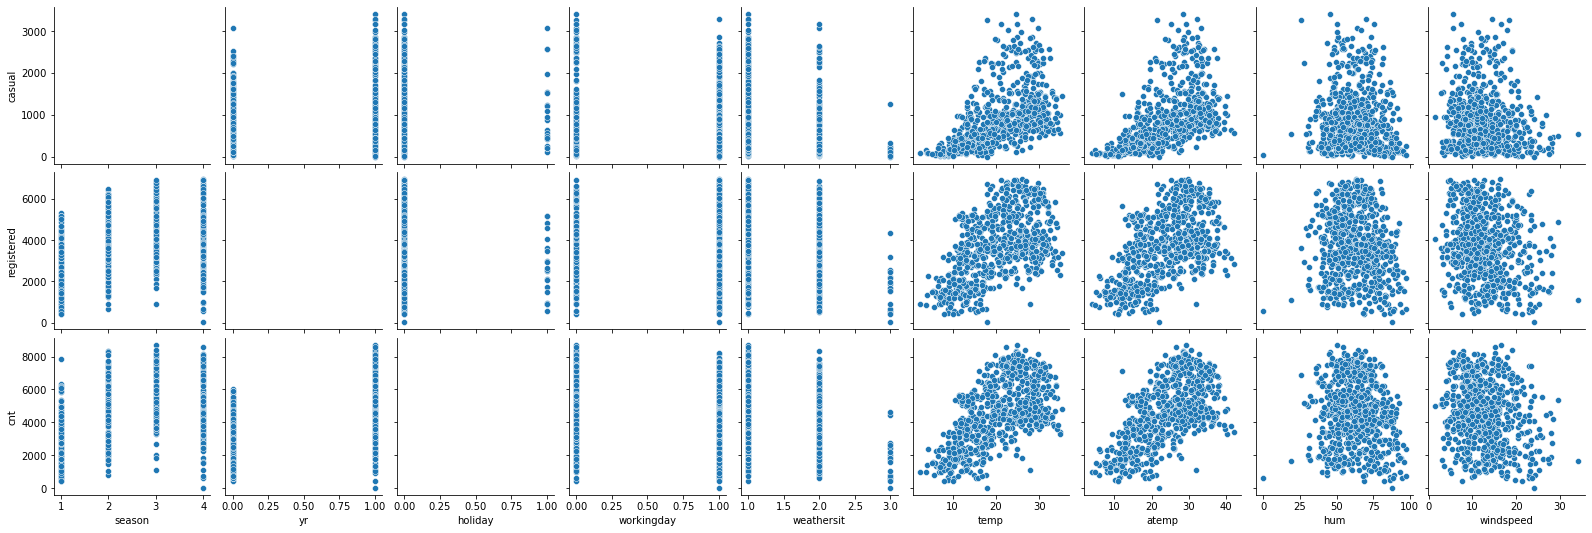

In [12]:
sns.pairplot(df, y_vars=['casual','registered','cnt'],x_vars=['season','yr','holiday','workingday','weathersit','temp','atemp','hum','windspeed'])
plt.show()

The pairplot doesn't reveal much, aside from the fact that most numerical variables are well spread

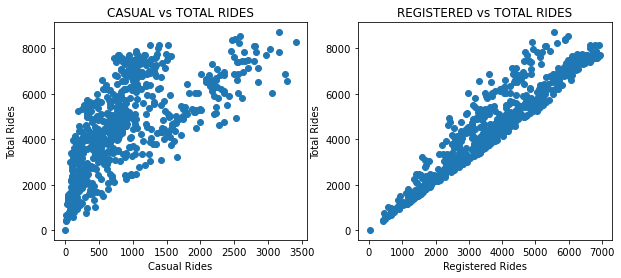

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(df.casual,df.cnt)
plt.title('CASUAL vs TOTAL RIDES')
plt.xlabel('Casual Rides')
plt.ylabel('Total Rides')
plt.subplot(1,2,2)
plt.scatter(df.registered,df.cnt)
plt.title('REGISTERED vs TOTAL RIDES')
plt.xlabel('Registered Rides')
plt.ylabel('Total Rides')
plt.show()

This scatter plot serves as a clear reminder of what the scatter plot looks like when 2 variables are highly correlated. It is obvious that these 2 variables are that much correlated to the target variable as the output variable is their sum.

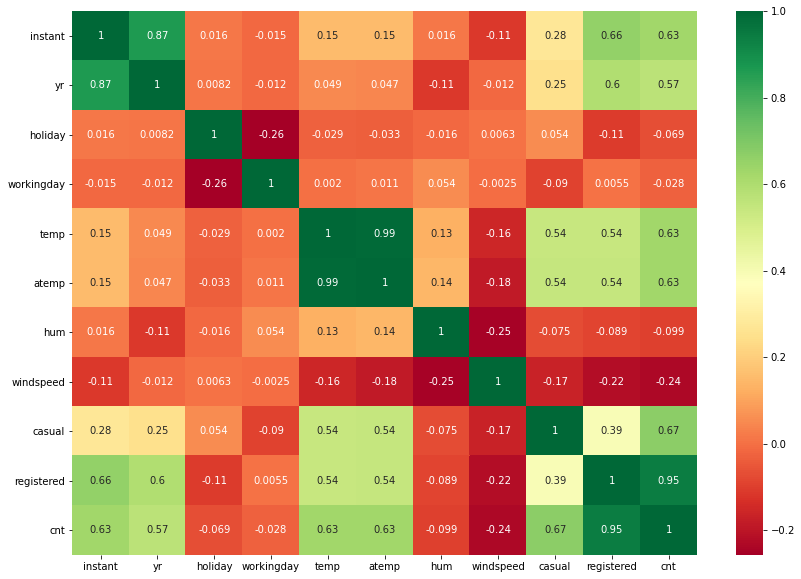

In [14]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

#### Above charts prove that there is a very deep linear relationship between Registered/Casual and Total Rides Count, but the reason to drop these and not use these into our model is predicated on these 2 variables not being independent variables, as they are basically the dependent variables that drive the 'cnt' variable with them. Hence they're required to be dropped

#### Also, I'll be dropping the 'atemp' feature as its basically the 'temp' feature with a correlation in between them of a whopping 99% 

# Data Preparation for Model Building

#### Some points to notice
- The 'instant' feature is just an index and hence grants no insight, so dropping it makes no change.
- The 'dteday' feature or the date has already been squeezed out for all the possibilities like weekday,weekend,year,month etc. Hence, there shouldn't be any harm in dropping it as well

In [15]:
df1 = df.iloc[:,2:]

In [16]:
### Replacing with original categorical values, wherever needed
df1.replace({'season' : {1:'spring', 2:'summer', 3:'fall', 4:'winter'}},inplace=True)
df1.replace({'mnth': {1:'JAN',2:'FEB',3:'MAR',4:'APR',5:"MAY",6:'JUN',7:'JUL',8:'AUG',9:"SEP",10:'OCT',11:'NOV',12:'DEC'}},inplace=True)
df1.replace({'weathersit': {1:'clear',2:'mist',3:'snow',4:'rain'}, 'weekday': {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}},inplace=True)

In [17]:
df1.head(8)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,JAN,0,Mon,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,JAN,0,Tue,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,JAN,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,JAN,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,JAN,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,spring,0,JAN,0,Sat,0,clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,spring,0,JAN,0,Sun,0,mist,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,spring,0,JAN,0,Mon,1,mist,6.765000,8.11270,53.5833,17.875868,68,891,959


In [18]:
### Dummy Variables for some nominal categoricals 
month = pd.get_dummies(df1.mnth,drop_first=True)
weather = pd.get_dummies(df1.weathersit,drop_first=True)
season1 = pd.get_dummies(df1.season,drop_first=True)
wd = pd.get_dummies(df1.weekday,drop_first=True)

In [19]:
### Concatenating dataframes and dropping original features, along with other features that are dropped
df1 = pd.concat([df1,month,weather,season1,wd],axis=1)
df1.drop(['season','mnth','weathersit','casual','registered','atemp','weekday'],axis=1,inplace=True)

In [20]:
df1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,mist,snow,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [21]:
df1.shape

(730, 29)

# Model Building

In [22]:
## Train test split, took a train size of 70%
df_train,df_test = train_test_split(df1,train_size=0.7,random_state=100)

In [23]:
##Scaling Numerical Variables...
num_vars=['temp','hum','windspeed','cnt']
std = StandardScaler()

In [24]:
df_train[num_vars] = std.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,mist,snow,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed
576,1,0,1,1.230870,0.515796,-0.331282,1.401236,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,-0.421238,-0.070634,-0.386359,-0.215182,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
728,1,0,1,-1.295618,-1.046051,2.017388,-1.380030,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
482,1,0,0,-0.628327,-1.001847,-0.780539,-0.136157,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
111,0,0,0,-0.849222,0.695551,0.354275,-1.438016,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


#### Dividing into X and Y

In [25]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building a preliminary model using SciKit, in order to be able to use the RFE to rank the features

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', False, 7),
 ('windspeed', True, 1),
 ('AUG', False, 9),
 ('DEC', True, 1),
 ('FEB', True, 1),
 ('JAN', True, 1),
 ('JUL', True, 1),
 ('JUN', False, 11),
 ('MAR', False, 14),
 ('MAY', False, 8),
 ('NOV', True, 1),
 ('OCT', False, 12),
 ('SEP', True, 1),
 ('mist', True, 1),
 ('snow', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', False, 6),
 ('Sat', False, 3),
 ('Sun', False, 4),
 ('Thu', False, 13),
 ('Tue', False, 5),
 ('Wed', False, 10)]

In [28]:
## Columns that RFE found out to be in Top 15
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'windspeed', 'DEC', 'FEB', 'JAN', 'JUL', 'NOV',
       'SEP', 'mist', 'snow', 'spring', 'summer', 'winter'],
      dtype='object')

In [29]:
## Columns that were found insignificant by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'hum', 'AUG', 'JUN', 'MAR', 'MAY', 'OCT', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [30]:
X1=X_train[X_train.columns[rfe.support_]]

#### Using Statsmodels package to build the model, so to get deeper into stats

In [31]:
## Adding constant
Xsm = sm.add_constant(X1)

## Building the model
lr1 = sm.OLS(y_train,Xsm).fit()

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.44e-185
Time:                        21:57:56   Log-Likelihood:                -256.13
No. Observations:                 510   AIC:                             544.3
Df Residuals:                     494   BIC:                             612.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3541      0.068     -5.235      0.0

#### The model's just fine with a Rsquared of 84.0% and the significance levels of the Beta Coefficients is also in check, except 'FEB' feature.<br>
##### We should check for multicollinearity to proceed further.

In [32]:
## Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values('VIF',ascending=False)

,Features,VIF
12,spring,3.77
2,temp,2.86
14,winter,2.65
6,JAN,2.45
0,yr,1.96
5,FEB,1.94
8,NOV,1.88
4,DEC,1.67
10,mist,1.53
7,JUL,1.40


The Vif levels are also sound in the above model(lr1), as all the values are well below 5%.

#### Now, as our previous model is just fine. We can either proceed with that model or try to improve upon it by removing the 'FEB' feature as its p-value are above 5%(general accepted insignificance threshold).

In [33]:
X2 = df_train[['yr', 'holiday', 'temp','windspeed','SEP','JUN','NOV',
       'DEC', 'JAN', 'MAY', 'mist', 'snow', 'spring', 'winter']]

In [34]:
## Adding constant
Xsm1 = sm.add_constant(X2)

## Building the model
lr2 = sm.OLS(y_train,Xsm1).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.16e-183
Time:                        21:58:08   Log-Likelihood:                -263.40
No. Observations:                 510   AIC:                             556.8
Df Residuals:                     495   BIC:                             620.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3316      0.046     -7.262      0.0

In [35]:
## Checking VIF
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values('VIF',ascending=False)

,Features,VIF
13,winter,2.57
12,spring,2.49
2,temp,2.41
6,NOV,1.84
8,JAN,1.76
0,yr,1.73
7,DEC,1.53
10,mist,1.44
5,JUN,1.19
4,SEP,1.18


- The model's performance actually dipped as our Rsquared fell, Adjusted Rsquared which should've increased after removing 'FEB', also fell indicating that this model's not better than our previous one.<br>
- Metrics like AIC and BIC, which penalise models for having insignificant features also took a hit.

Let's see if we can improve our model by adding back, 'FEB' and also adding the next best feature namely, 'workingday'

In [36]:
X3 = df_train[['yr', 'holiday', 'temp', 'windspeed', 'DEC', 'FEB', 'JAN', 'JUL', 'NOV',
       'SEP', 'mist', 'snow', 'spring', 'summer', 'winter','workingday']]

In [37]:
## Adding constant
Xsm2 = sm.add_constant(X3)

## Building the model
lr3 = sm.OLS(y_train,Xsm2).fit()

print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.17e-185
Time:                        21:58:12   Log-Likelihood:                -253.22
No. Observations:                 510   AIC:                             540.4
Df Residuals:                     493   BIC:                             612.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2810      0.074     -3.796      0.0

In [38]:
## Checking VIF
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values,i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values('VIF',ascending=False)

,Features,VIF
12,spring,4.37
2,temp,3.11
14,winter,3.11
15,workingday,3.11
6,JAN,2.48
0,yr,1.98
5,FEB,1.96
8,NOV,1.90
13,summer,1.83
4,DEC,1.68


#### This is a better model than lr2 because of the following points: -
- Rsquared improved by a good margin.
- Adjusted Rsquared which should've fallen if the newly added features were not significant, but it rose.
- AIC and BIC both improved which didn't penalise our model for new features.

The only problem with this model is the p-value of 'FEB', which will be dealt with.Let's try to improve more by adding the next best feature, 'hum'

In [39]:
X4 = df_train[['yr', 'holiday', 'temp', 'windspeed', 'DEC', 'FEB', 'JAN', 'JUL', 'NOV',
       'SEP', 'mist', 'snow', 'spring', 'summer', 'winter','workingday','hum']]

In [40]:
## Adding constant
Xsm3 = sm.add_constant(X4)

## Building the model
lr4 = sm.OLS(y_train,Xsm3).fit()

print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          4.39e-188
Time:                        21:58:18   Log-Likelihood:                -244.72
No. Observations:                 510   AIC:                             525.4
Df Residuals:                     492   BIC:                             601.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3664      0.076     -4.833      0.0

In [41]:
## Checking VIF
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values,i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values('VIF',ascending=False)

,Features,VIF
12,spring,4.42
2,temp,3.17
15,workingday,3.12
14,winter,3.12
6,JAN,2.48
10,mist,2.14
0,yr,2.04
5,FEB,1.96
8,NOV,1.91
13,summer,1.86


#### lr4 is better than lr3 because of the following points: -
- Rsquared improved by a good margin.
- Adjusted Rsquared which should've fallen if the newly added features were not significant, but it went up.
- AIC and BIC both improved which didn't penalise our model for new features.

The only problem still remains i.e 'FEB' whose insignificance actually rose in this model. Therefore, we remove it in our next iteration....<br>
Now, I tried to improve the model further by adding in "AUG", our next best feature, but its p-value came out 49.6% and all the metrics took a hit, hence the next model lr5 is our final model.

In [42]:
X5 = df_train[['yr', 'holiday', 'temp', 'windspeed', 'DEC', 'JAN', 'JUL', 'NOV',
       'SEP', 'mist', 'snow', 'spring', 'summer', 'winter','workingday','hum']]

In [43]:
## Adding constant
Xsm4 = sm.add_constant(X5)

## Building the model
lr5 = sm.OLS(y_train,Xsm4).fit()

print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.19e-188
Time:                        21:58:23   Log-Likelihood:                -246.05
No. Observations:                 510   AIC:                             526.1
Df Residuals:                     493   BIC:                             598.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3830      0.075     -5.093      0.0

In [44]:
## Checking VIF
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values,i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values('VIF',ascending=False)

,Features,VIF
11,spring,3.43
13,winter,3.11
14,workingday,3.10
2,temp,3.02
9,mist,2.14
0,yr,2.04
7,NOV,1.87
12,summer,1.85
5,JAN,1.79
15,hum,1.79


#### The final model is lr5, as all our p-values are in check and all other metrics are also similar, also there's a major improvement in VIF levels indicating lower multicollinearity.

# Evaluation and Predictions on the model

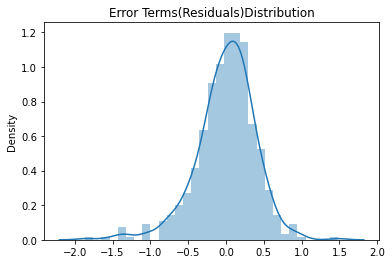

In [45]:
## Predictions using model on training dataset.
y_train_pred = lr5.predict(Xsm4)
train_residuals = y_train-y_train_pred

## Visualising the error terms on train set
sns.distplot(train_residuals)
plt.title('Error Terms(Residuals)Distribution')
plt.show()

##### Just to be sure though, I'll be using RMSE(Residual Mean Squared Error) method to check whether our chosen model is the best or not.

In [46]:
## lr5
round(mean_squared_error(y_train,y_train_pred)*100,1)

15.4

In [47]:
## lr4
y_train_pred2 = lr4.predict(Xsm3)
round(mean_squared_error(y_train,y_train_pred2)*100,1)

15.3

In [48]:
## lr, the original model
y_train_pred3 = lr1.predict(Xsm)
round(mean_squared_error(y_train,y_train_pred3)*100,1)

16.0

#### Now, our lr5's(final model) RMSE definitely improved from the 1st iteration, but is just a tad bit (0.1) poorer than lr4, but the significance levels of lr5 are much better than lr4... So, I'll move ahead with lr5 as the final model.

In [49]:
## Scaling test data
df_test[num_vars] = std.transform(df_test[num_vars])

In [50]:
## Checking the scale on the test set
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,mist,snow,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.094304,-0.084140,-0.044745,0.038600,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.318182,0.027273,0.254545,0.263636,0.236364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,1.033465,1.020528,0.940739,0.977532,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.466833,0.163248,0.436599,0.441609,0.425817,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,-2.175395,-2.666825,-2.143940,-2.075347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.806655,-0.832398,-0.719418,-0.601712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.091882,-0.170826,-0.122362,0.049859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.968557,0.640461,0.482415,0.732603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.980997,2.413579,2.868429,2.006239,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
## Dividing test data into X and Y
X_test = df_test[['yr', 'holiday', 'temp', 'windspeed', 'DEC', 'JAN', 'JUL', 'NOV',
       'SEP', 'mist', 'snow', 'spring', 'summer', 'winter','workingday','hum']]
y_test = df_test['cnt']

In [52]:
## Adding the constant
XSM = sm.add_constant(X_test)

In [53]:
## Predictions on the test set
y_test_pred = lr5.predict(XSM)

## Residuals in the test set
test_residuals = y_test - y_test_pred

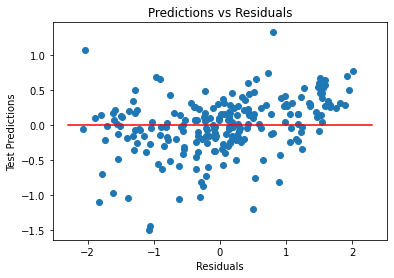

In [54]:
## Checking for homoscedasticity on test set
plt.scatter(y_test,test_residuals)
plt.plot([-2.3,2.3],[0,0],color='red')
plt.xlabel('Residuals')
plt.ylabel('Test Predictions')
plt.title('Predictions vs Residuals')
plt.show()

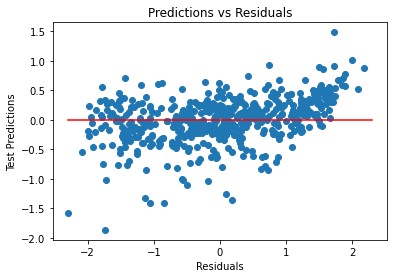

In [55]:
## Checking for homoscedasticity on train set
plt.scatter(y_train,train_residuals)
plt.plot([-2.3,2.3],[0,0],color='red')
plt.xlabel('Residuals')
plt.ylabel('Test Predictions')
plt.title('Predictions vs Residuals')
plt.show()

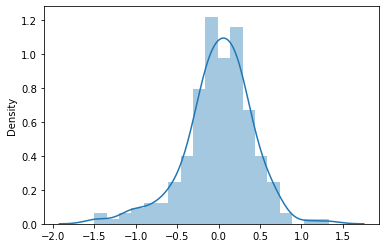

In [56]:
## Distribution of Error terms on test residuals
sns.distplot(test_residuals)
plt.show()

#### The Error Terms in the test set also follow a normal distribution like they did in the training set, which is a great sign that our model is doing a decent job...

#### Rsquared on Test set

In [57]:
## Rsquared from the test set
round(r2_score(y_test,y_test_pred)*100,2)

82.35

#### Our model's Rsquared was 84.6%, the test set's Rsquared is 82.35%. This is pretty good. Our model has learnt enough to replicate its results on an unseen datatest. Hence, the model is really great. The model and its coefficients are as below.....

In [58]:
pd.DataFrame(lr5.params, columns=['Coefficients']).sort_values(by='Coefficients', ascending=False)

,Coefficients
yr,1.027878
temp,0.481728
winter,0.456339
SEP,0.333674
summer,0.190175
workingday,-0.086497
hum,-0.101379
windspeed,-0.142198
DEC,-0.165595
NOV,-0.169420


#### Evaluating this model, some business pointers to help the business going forward... -
- The Business's popularity is going up by the year, so maybe people aren't aware about the company.Hence, a good marketing spend should help the cause.
- Now, another thing to note is that people are not using bikes on holidays, so maybe discounts and special offers on holidays may reverse this notion of these bikes being for work commute only.
- It is visible that this business has an off season during the year begining and year ending months. So, the company should find ways to make these bikes attractive during these off-months by some special discounts.